## Exercise 9.5: Singular values

In [5]:
import numpy as np
from scipy.linalg import toeplitz
from numpy import linalg as LA

n=200
for i in range(1,9):
    p = i / 8
    C = np.random.choice(2,(n,n),p=[p,1-p])
    sigma = LA.svd(C,1,0)[1]
    print("n, p , sigma: ",end='')
    print(n, p, sigma)

n, p , sigma: 200 0.125 9.462217116607652
n, p , sigma: 200 0.25 11.96192922668237
n, p , sigma: 200 0.375 13.52014812158653
n, p , sigma: 200 0.5 13.913122111917804
n, p , sigma: 200 0.625 13.53520562904356
n, p , sigma: 200 0.75 12.048043764934318
n, p , sigma: 200 0.875 9.253059113022973
n, p , sigma: 200 1.0 0.0


# 10 Scipy

## Exercise 10.1: Least squares

In [6]:
from scipy.optimize import leastsq
import numpy as np

m = 20
n = 10

def func(p,x):
	s = np.random.rand(m)
	for i in range(m):
		tmp = 0.0
		for j in range(n):
			tmp += x[i][j]*p[j]
		s[i] = tmp
	
	return s

def err(p,A,y):
	e = (func(p,A)-y)
	return e
	
A = np.random.rand(m,n)
b = np.random.rand(m)
p = np.random.rand(n)

x = np.linalg.solve(A.T@A,A.T@b)
print(x)
rst = leastsq(err,p,args=(A,b))
x = rst[0]
print(x)

print(np.sum((err(x,A,b)**2)/m))

[ 0.3738607   0.39754416 -0.01074094 -0.46765266  0.04894182  0.37337602
 -0.38208962  0.02847801  0.54034357  0.10795102]
[ 0.3738606   0.39754402 -0.01074066 -0.46765274  0.04894187  0.373376
 -0.38208953  0.02847784  0.54034371  0.10795095]
0.03395125289244423


## Exercise 10.2: Optimization


In [8]:
import math
from scipy.optimize import minimize_scalar

func = lambda x: -((math.sin(x-2))**2)*math.e**(-(x**2))
rst = minimize_scalar(func)
print(-rst['fun'])

0.9116854118471548


## Exercise 10.3: Pairwise distances

In [9]:
import numpy as np
from scipy.spatial import distance

X = np.random.randn(10,8)
dm = distance.pdist(X,metric='euclidean')
print(dm)

[4.99463688 3.61966983 5.70295029 4.89612967 4.74447108 3.57105702
 4.39058628 5.09764513 4.00737801 4.33300315 4.50953337 5.57760563
 2.14594109 3.53666053 4.64752424 3.91949038 3.22100277 4.13828064
 3.68700821 4.61423318 2.88758146 4.84040333 4.62729885 4.14428788
 5.4938967  4.85513022 4.86277022 4.92921774 2.43888037 4.32267487
 5.30179848 4.59349417 4.47975201 6.6581527  4.95159874 3.80083165
 3.51759081 4.40048152 1.63922854 3.4912271  4.36103973 3.85069338
 4.82206195 3.01029994 4.01126311]


# 11 Matplotlib

## Exercise 11.1: Plotting a function

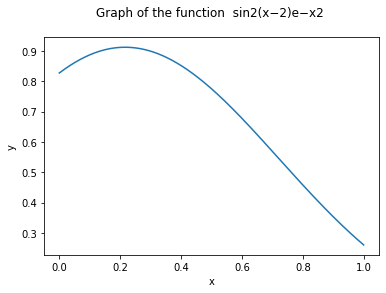

In [11]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0,1,500)
y = (np.sin(x-2)**2)*np.exp(-x**2)
plt.plot(x,y)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Graph of the function  sin2(x−2)e−x2 \n')
plt.show()

## Exercise 11.2: Data

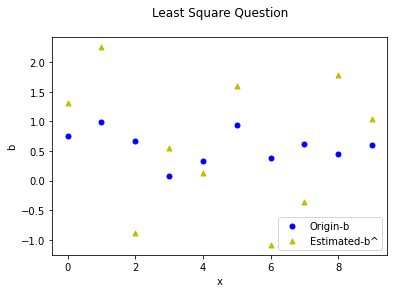

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA

x = np.random.rand(20,10)
b = np.random.rand(10,1)
z = np.random.standard_normal((20,1))
y = x.dot(b)-z

b1 = LA.lstsq(x,y,rcond=None)[0]

#绘制
x1 = np.array(list(range(10)))
plt.scatter(x1,b,label='Origin-b',color='b',s=25,marker='o')
plt.scatter(x1,b1,label='Estimated-b^',color='y',s=25,marker='^')

plt.xlabel('x')
plt.ylabel('b')
plt.title('Least Square Question\n')
plt.legend()
plt.show()

## Exercise 11.3: Histogram and density estimation

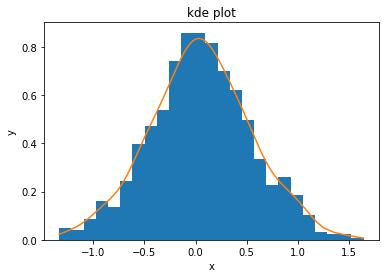

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

z = np.random.normal(0,0.5,1000)
z = sorted(z)
kernel = gaussian_kde(z)

plt.hist(z,bins=25,density=True)
plt.plot(z,kernel.pdf(z))

plt.title('kde plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()